[Rupal] person 5
	 <class 'list'> 162
	 <class 'list'> 10
	 <class 'list'> 144
	 <class 'list'> 10
	 <class 'list'> 10
[Rupal] sofa 9
	 <class 'list'> 86
	 <class 'list'> 10
	 <class 'list'> 10
	 <class 'list'> 106
	 <class 'list'> 10
	 <class 'list'> 10
	 <class 'list'> 90
	 <class 'list'> 92
	 <class 'list'> 120


353 500
Total: 2
[0.02266288951841361, 0.02400000000000002, 0.9971671388101984, 0.9971671388101984]


<Figure size 1296x864 with 0 Axes>

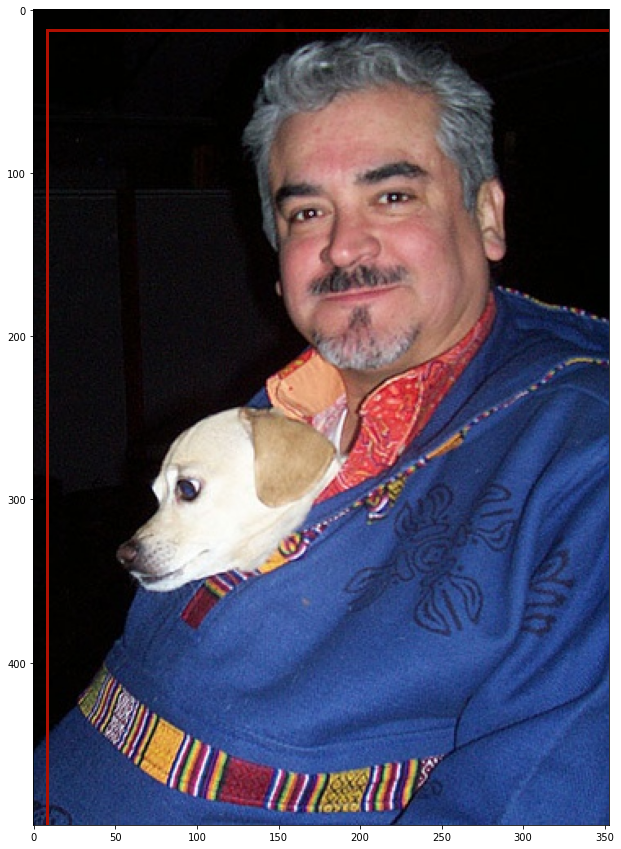

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import json

def yolo_to_xml_bbox(bbox, w, h):
    # x_center, y_center width height to 
    xmin = bbox[0] - bbox[2] / 2  # top left x
    ymin = bbox[1] - bbox[3] / 2  # top left y
    xmax = bbox[0] + bbox[2] / 2  # bottom right x
    ymax = bbox[0] + bbox[2] / 2  # bottom right y
    out_norm = [xmin, ymin, xmax, ymax]
    print(out_norm)
    out = [xmin * w, ymin * h, xmax * w, ymax * h]
    return out
    # return [bbox[0] * w, bbox[1] * h, bbox[2] * w, bbox[3] * h]


sample_image = "/home/azureuser/cloudfiles/code/Users/rupaljain/vision_datasets/VOC2007/images/000001.jpg"
lb_file = "/home/azureuser/cloudfiles/code/Users/rupaljain/vision_datasets/VOC2007/labels/000001.txt"
# 0 0.34419263456090654 0.611 0.4164305949008499 0.262
# 1 0.509915014164306 0.51 0.9745042492917847 0.972

# <size>
# 	<width>353</width>
# 	<height>500</height>
# 	<depth>3</depth>
# </size>

# <xmin>48</xmin>
# <ymin>240</ymin>
# <xmax>195</xmax>
# <ymax>371</ymax>

# <xmin>8</xmin>
# <ymin>12</ymin>
# <xmax>352</xmax>
# <ymax>498</ymax>

IMAGE_SIZE = (18, 12)
plt.figure(figsize=IMAGE_SIZE)
img_np = mpimg.imread(sample_image)
img = Image.fromarray(img_np.astype("uint8"), "RGB")
x, y = img.size
print(x, y)

fig, ax = plt.subplots(1, figsize=(15, 15))
# Display the image
ax.imshow(img_np)

# 0 [48, 240, 195, 371] 353 500 0.34419263456090654 0.611 0.4164305949008499 0.262
# 1 [8, 12, 352, 498] 353 500 0.509915014164306 0.51 0.9745042492917847 0.972

with open(lb_file, 'r') as f:
    c_bbox = [x.split() for x in f.read().strip().splitlines()]
print("Total:", len(c_bbox))
c_bbox = np.array(c_bbox[0], dtype=np.float32)


# original_bbox_xml = [48, 240, 195, 371]
# xmltoyolo_bbox = [0.34419263456090654, 0.611, 0.4164305949008499, 0.262]
# xmltoyolo_to_xml = yolo_to_xml_bbox(xmltoyolo_bbox, x, y)

original_bbox_xml = [8, 12, 352, 498]
xmltoyolo_bbox = [0.509915014164306, 0.51, 0.9745042492917847, 0.972]
xmltoyolo_to_xml = yolo_to_xml_bbox(xmltoyolo_bbox, x, y)

plot_bbox = xmltoyolo_to_xml

color = np.random.rand(3)  #'red'
rect = patches.Rectangle(
    (plot_bbox[0], plot_bbox[1]),
    plot_bbox[2],
    plot_bbox[3],
    linewidth=3,
    edgecolor=color,
    facecolor="none",
)

ax.add_patch(rect)
# plt.text(topleft_x, topleft_y - 10, label, color=color, fontsize=20)
plt.show()

In [1]:
import glob
import os
import json


val_jsonl_path = "/home/azureuser/cloudfiles/code/Users/rupaljain/vision_datasets/VOC2007/voc2007_val_polygon.jsonl"
train_jsonl_path = "/home/azureuser/cloudfiles/code/Users/rupaljain/vision_datasets/VOC2007/voc2007_train_polygon.jsonl"
output_dir = "/home/azureuser/cloudfiles/code/Users/rupaljain/vision_datasets/VOC2007/labels/"

# create the labels folder (output directory)
os.makedirs(output_dir, exist_ok=True)

with open(val_jsonl_path, "r") as json_file:
    json_list = list(json_file)

sample_json_str = json_list[0]
result = json.loads(sample_json_str)
# print(result)

curr_labels = result["label"]

polygons = []
for curr_label in curr_labels:
    curr_class = curr_label["label"]
    curr_polygons = curr_label["polygon"]
    print(f"[Rupal] {curr_class} {len(curr_polygons)}")
    curr_polygon = []
    for poly in curr_polygons:
        print("\t", type(poly), len(poly))
        curr_polygon.extend(poly)
    polygons.append(curr_polygon)
sample_polygon = polygons[0] #result["label"][1]["polygon"][-1]

[Rupal] person 5
	 <class 'list'> 162
	 <class 'list'> 10
	 <class 'list'> 144
	 <class 'list'> 10
	 <class 'list'> 10
[Rupal] sofa 9
	 <class 'list'> 86
	 <class 'list'> 10
	 <class 'list'> 10
	 <class 'list'> 106
	 <class 'list'> 10
	 <class 'list'> 10
	 <class 'list'> 90
	 <class 'list'> 92
	 <class 'list'> 120


In [2]:
from random import sample
import numpy as np 

len(sample_polygon)
sample_polygon_x = sample_polygon[0::2]
sample_polygon_y = sample_polygon[1::2]
print(len(sample_polygon), len(sample_polygon_x), len(sample_polygon_y))

sample_polygon_arr = np.array([sample_polygon_x, sample_polygon_y])
sample_polygon_arr = sample_polygon_arr.T
print(sample_polygon_arr.shape)

336 168 168
(168, 2)


/tmp/ipykernel_62365/1516384876.py:25: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  poly = patches.Polygon(polygon_np, True, facecolor=color, alpha=0.4)


<Figure size 1296x864 with 0 Axes>

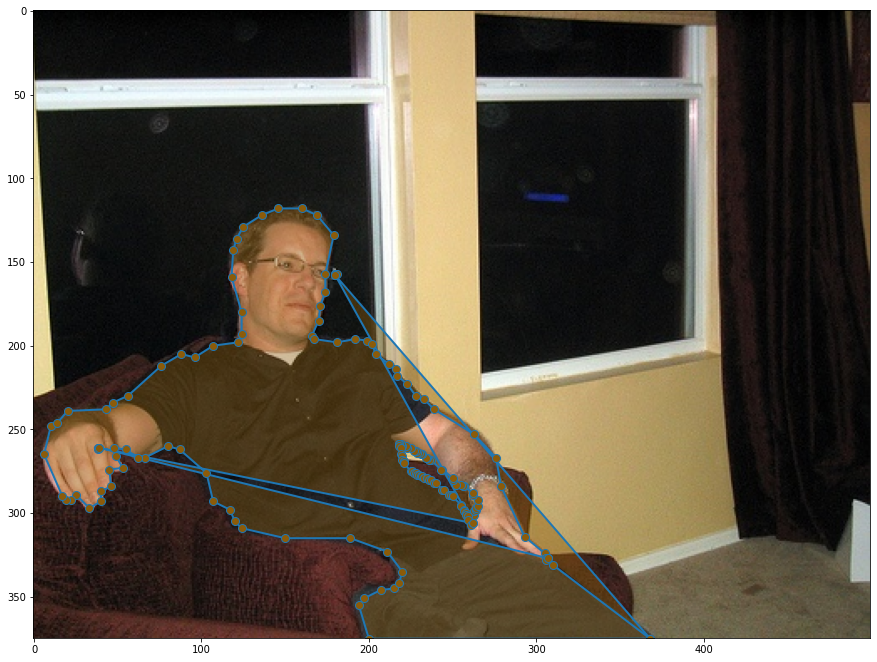

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from matplotlib.lines import Line2D
from PIL import Image
import numpy as np
import json

sample_image = "/home/azureuser/cloudfiles/code/Users/rupaljain/vision_datasets/VOC2007/JPEGImages/003530.jpg"
IMAGE_SIZE = (18, 12)
plt.figure(figsize=IMAGE_SIZE)
img_np = mpimg.imread(sample_image)
img = Image.fromarray(img_np.astype("uint8"), "RGB")
x, y = img.size

fig, ax = plt.subplots(1, figsize=(15, 15))
color = np.random.rand(3)  #'red'
# Display the image
ax.imshow(img_np)
polygon_np = np.array(sample_polygon_arr)
polygon_np = polygon_np.reshape(-1, 2)
polygon_np[:, 0] *= x
polygon_np[:, 1] *= y
poly = patches.Polygon(polygon_np, True, facecolor=color, alpha=0.4)
ax.add_patch(poly)
poly_line = Line2D(
    polygon_np[:, 0],
    polygon_np[:, 1],
    linewidth=2,
    marker="o",
    markersize=8,
    markerfacecolor=color,
)
ax.add_line(poly_line)

In [4]:
VOC_CLASSES = [
    "background",
    "aeroplane",
    "bicycle",
    "bird",
    "boat",
    "bottle",
    "bus",
    "car",
    "cat",
    "chair",
    "cow",
    "diningtable",
    "dog",
    "horse",
    "motorbike",
    "person",
    "potted plant",
    "sheep",
    "sofa",
    "train",
    "tv/monitor",
]


VOC_COLORMAP = [
    [0, 0, 0],
    [128, 0, 0],
    [0, 128, 0],
    [128, 128, 0],
    [0, 0, 128],
    [128, 0, 128],
    [0, 128, 128],
    [128, 128, 128],
    [64, 0, 0],
    [192, 0, 0],
    [64, 128, 0],
    [192, 128, 0],
    [64, 0, 128],
    [192, 0, 128],
    [64, 128, 128],
    [192, 128, 128],
    [0, 64, 0],
    [128, 64, 0],
    [0, 192, 0],
    [128, 192, 0],
    [0, 64, 128],
]

VOC_CLASSES_PER_OBJECTID = [
    "background", "aeroplane", "bicycle", "bird", "boat", "bottle", "bus"
    "car", "cat", "chair", "cow", "diningtable", "dog", "horse", "motorbike", 
    "person", "pottedplant", "sheep", "sofa", "train", "tvmonitor"
]

In [8]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [30]:
import cv2 
def _convert_to_segmentation_mask(mask):
    # This function converts a mask from the Pascal VOC format to the format required by AutoAlbument.
    #
    # Pascal VOC uses an RGB image to encode the segmentation mask for that image. RGB values of a pixel
    # encode the pixel's class.
    #
    # AutoAlbument requires a segmentation mask to be a NumPy array with the shape [height, width, num_classes].
    # Each channel in this mask should encode values for a single class. Pixel in a mask channel should have
    # a value of 1.0 if the pixel of the image belongs to this class and 0.0 otherwise.
    # height, width = mask.shape[:2]
    # segmentation_mask = np.zeros((height, width, len(VOC_COLORMAP)), dtype=np.float32)
    # for label_index, label in enumerate(VOC_COLORMAP):
    #     segmentation_mask[:, :, label_index] = np.all(mask == label, axis=-1).astype(float)
    # return segmentation_mask
    height, width = mask.shape[:2]
    segmentation_mask_dict = {}
    for label_index, label in enumerate(VOC_COLORMAP):
        if label_index == 0:
            continue 
        curr_mask = np.all(mask == label, axis=-1).astype(float)
        if np.count_nonzero(curr_mask) > 0:
            segmentation_mask_dict[VOC_CLASSES[label_index]] = curr_mask
    return segmentation_mask_dict
    
def binarise_mask(mask_fname):
    mask = Image.open(mask_fname)
    mask = np.array(mask)
    # instances are encoded as different colors
    obj_ids = np.unique(mask)
    # first id is the background, so remove it
    obj_ids = obj_ids[1:]
    # Remove the white bundary
    boundary = obj_ids == 255
    obj_ids = obj_ids[~boundary]
    obj_id_to_mask = {}
    for obj_id_index, obj_id in enumerate(obj_ids):
        print(obj_id)
        # split the color-encoded mask into a set of binary masks
        obj_id_to_mask[obj_id] = mask == obj_ids[obj_id_index, None, None]
    
    # mask = cv2.imread(mask_fname)
    # mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
    # mask = _convert_to_segmentation_mask(mask)

    return obj_id_to_mask #mask

sample_image = "/home/azureuser/cloudfiles/code/Users/rupaljain/vision_datasets/VOC2007/SegmentationClass/003530.png"
obj_id_to_mask = binarise_mask(sample_image)
print(obj_id_to_mask.keys())

15
18
dict_keys([15, 18])


15 person
32896 32896 117 156 True
18 sofa
18032 18032 196 102 True
./sample.txt


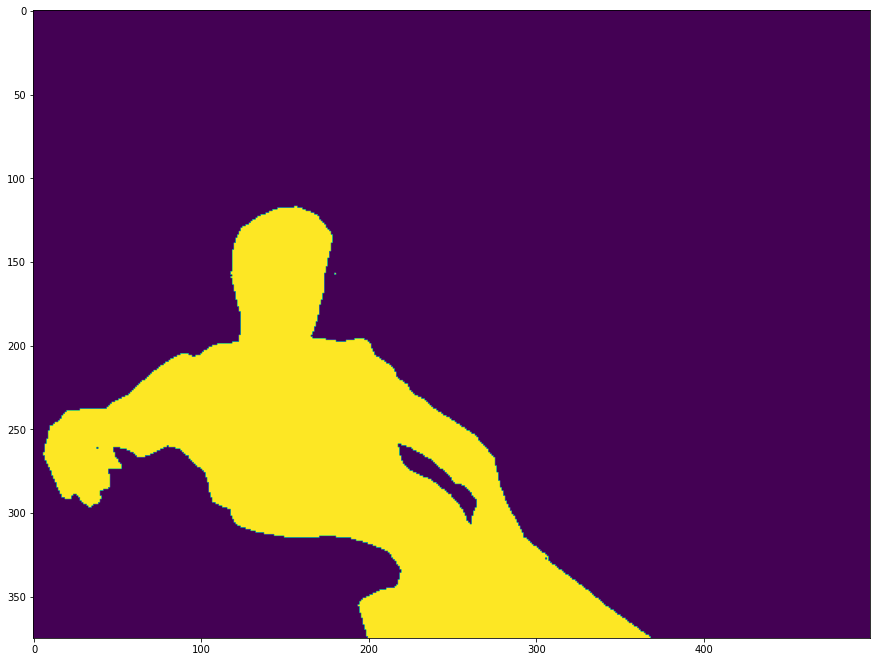

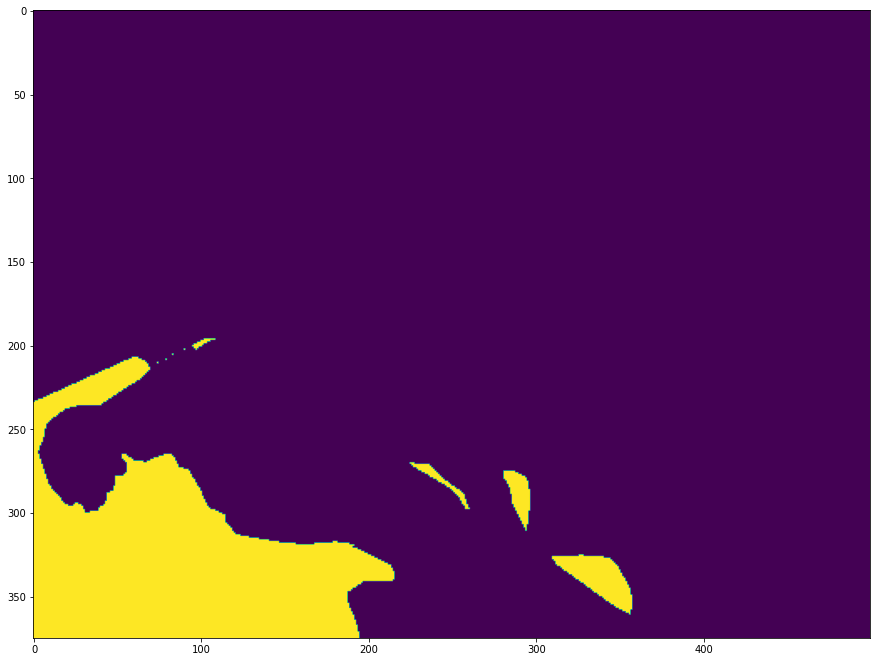

In [45]:
output_list = []
for class_name, class_mask in obj_id_to_mask.items():
    print(class_name, VOC_CLASSES[class_name]) #VOC_CLASSES.index(class_name))
    fig, ax = plt.subplots(1, figsize=(15, 15))
    color = np.random.rand(3)  #'red'
    # Display the image
    ax.imshow(class_mask)

    y_indices, x_indices = np.where(class_mask != 0)
    print(len(y_indices), len(x_indices), y_indices[0], x_indices[0], class_mask[y_indices[0], x_indices[0]])

    h, w = class_mask.shape
    normalised_y_indices = [y_index/h for y_index in y_indices]
    normalised_x_indices = [x_index/w for x_index in x_indices]

    curr_mask_line = [str(class_name)]
    for x_index, y_index in zip(normalised_x_indices, normalised_y_indices):
        curr_mask_line.extend([str(x_index), str(y_index)])
    
    curr_mask_line = " ".join(curr_mask_line)

    output_list.append(curr_mask_line)

if output_list:
    # generate a YOLO format text file for each polygon file
    save_path = os.path.join("./", f"sample.txt")
    print(save_path)
    with open(save_path, "w", encoding="utf-8") as f:
        f.write("\n".join(output_list))

In [35]:
sample_coco = "/home/azureuser/cloudfiles/code/Users/rupaljain/coco/labels/val2017/000000000139.txt"
with open(sample_coco, 'r') as f:
    l = [x.split() for x in f.read().strip().splitlines()]
    if any([len(x) > 8 for x in l]):  # is segment
        classes = np.array([x[0] for x in l], dtype=np.float32)
        segments = [np.array(x[1:], dtype=np.float32).reshape(-1, 2) for x in l]  # (cls, xy1...)